<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/MLAZ_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Simple Linear Regression

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# def scoring function
def custom_absolute_percentual_error(real, pred):
  absolute_percentual = np.absolute(real - pred)/real
  return "Absolute percentual error {:.2f}%".format(100 * absolute_percentual.mean())

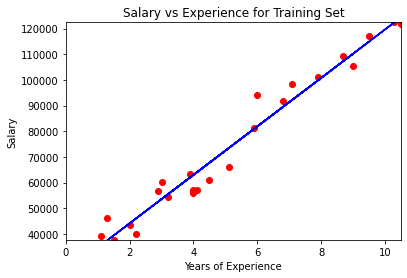

'Absolute percentual error 7.74%'

In [57]:
# loading and preprocessing
url = "https://raw.githubusercontent.com/LeoFernanndes/ML-A-a-Z/master/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/Python/Salary_Data.csv"
df = pd.read_csv(url)
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

# fitting data
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

# making predictions
y_pred = regressor.predict(X_test)

# visualize real data x regressor
fig, ax = plt.subplots(facecolor='white')
plt.scatter(X_train, y_train, color="red")
ax.set_ylim((df.Salary.min(), df.Salary.max()))
ax.set_xlim((0, df.YearsExperience.max()))
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title('Salary vs Experience for Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# evaluation
custom_absolute_percentual_error(y_test, y_pred)

## Multiple Linear Regression

In [61]:
# loading and preprocessing
url = "https://raw.githubusercontent.com/LeoFernanndes/ML-A-a-Z/master/Part%202%20-%20Regression/Section%205%20-%20Multiple%20Linear%20Regression/Python/50_Startups.csv"
df = pd.read_csv(url)
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough")
X = np.array(ct.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fitting data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# making predictions
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

# evaluation
custom_absolute_percentual_error(y_test, y_pred)

'Absolute percentual error 8.93%'

## Plynomial Regression

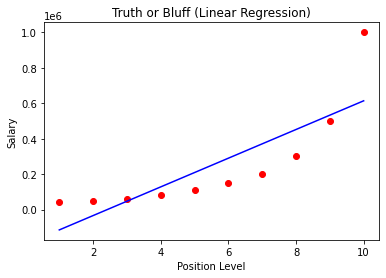

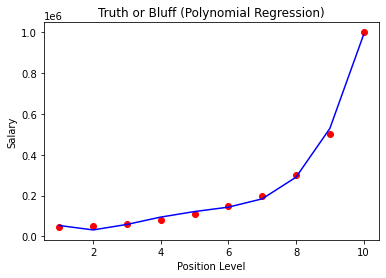

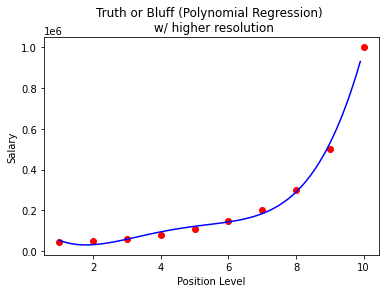

In [102]:
url = "https://raw.githubusercontent.com/LeoFernanndes/ML-A-a-Z/master/Part%202%20-%20Regression/Section%206%20-%20Polynomial%20Regression/Python/Position_Salaries.csv"
df = pd.read_csv(url)
X = df.iloc[:, 1: -1].values
y = df.iloc[:, -1].values

# adjusting linear model
lin_reg = LinearRegression()
lin_reg.fit(X, y)


from sklearn.preprocessing import PolynomialFeatures


# creating a transformed X
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# visualizing
fig, ax = plt.subplots(facecolor='white')
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
print("")

fig, ax = plt.subplots(facecolor='white')
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg_2.predict(X_poly), color="blue")
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
print("")

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
fig, ax = plt.subplots(facecolor='white')
plt.scatter(X, y, color="red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color="blue")
plt.title('Truth or Bluff (Polynomial Regression) \n w/ higher resolution')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
print("")

## SVM Regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


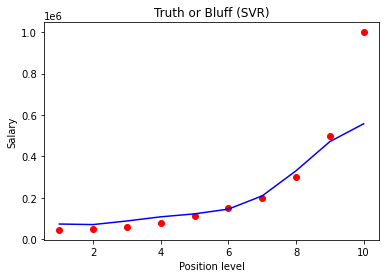

In [122]:
url = "https://raw.githubusercontent.com/LeoFernanndes/ML-A-a-Z/master/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/Python/Position_Salaries.csv"
df = pd.read_csv(url)
X = df.iloc[:, 1: -1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y), 1)


from sklearn.preprocessing import StandardScaler


# feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


from sklearn.svm import SVR


regressor = SVR(kernel="rbf")
regressor.fit(X, y)

# sc_y.inverse_transform(regressor.predict(sc_X.transform([[8]]))) # inverse result from predction transformed x
fig, ax = plt.subplots(facecolor='white')
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Decision Tree

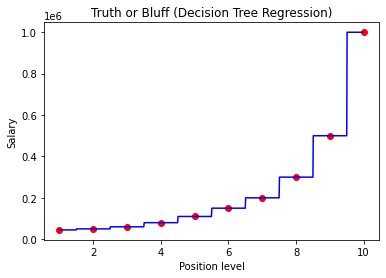

In [127]:
url = "https://raw.githubusercontent.com/LeoFernanndes/ML-A-a-Z/master/Part%202%20-%20Regression/Section%208%20-%20Decision%20Tree%20Regression/Python/Position_Salaries.csv"
df = pd.read_csv(url)
X = df.iloc[:, 1: -1].values
y = df.iloc[:, -1].values


from sklearn.tree import DecisionTreeRegressor


fig, ax = plt.subplots(facecolor='white')
regressor = DecisionTreeRegressor()
regressor.fit(X, y)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# visualizing
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Random Forest

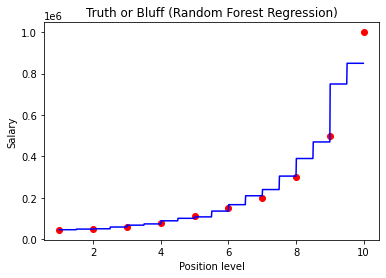

In [130]:
url = "https://raw.githubusercontent.com/LeoFernanndes/ML-A-a-Z/master/Part%202%20-%20Regression/Section%208%20-%20Decision%20Tree%20Regression/Python/Position_Salaries.csv"
df = pd.read_csv(url)
X = df.iloc[:, 1: -1].values
y = df.iloc[:, -1].values


from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

# visualizing
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()